### Imports

In [18]:
import numpy as np
from numpy.linalg import norm, eig, inv
from scipy.linalg import lu_factor, lu_solve
from matplotlib import pyplot as plt
from time import time

### Random symmetric matrix

In [4]:
def get_random_matrix(size):
    matrix = np.random.rand(size, size)
    matrix = (matrix + matrix.T) / 2
    return matrix

### Power method

In [65]:
def power_method(matrix, iterations, epsilon, get_iterations=False):
    vector = np.random.rand(matrix.shape[0])
    prev_vector = np.zeros((matrix.shape[0]))

    curr_iteration = 0
    while not norm(vector - prev_vector) < epsilon and curr_iteration < iterations:
        prev_vector = vector.copy()

        vector = matrix @ vector
        vector /= norm(vector)

        curr_iteration += 1

    eigenvalue = vector @ matrix @ vector / (vector @ vector)
    
    if get_iterations:
        return eigenvalue, vector, curr_iteration
    else:
        return eigenvalue, vector

### Inverse power method

In [66]:
def inverse_power_method(matrix, sigma, iterations, epsilon):
    vector = np.random.rand(matrix.shape[0])
    prev_vector = np.zeros((matrix.shape[0]))

    lu, piv = lu_factor((matrix - sigma * np.identity(matrix.shape[0])))

    curr_iteration = 0
    while not norm(vector - prev_vector) < epsilon and curr_iteration < iterations:
        prev_vector = vector.copy()

        vector = lu_solve((lu, piv), vector)
        vector /= norm(vector)

        curr_iteration += 1

    return vector


### Rayleigh quotient iteration

In [72]:
def rayleight_quotient_iteration(matrix, sigma, iterations, epsilon, get_iterations=False):
    vector = np.random.rand(matrix.shape[0])
    prev_vector = np.zeros((matrix.shape[0]))

    modified_matrix = inv(matrix - sigma*np.identity(matrix.shape[0]))

    curr_iteration = 0
    while not norm(vector - prev_vector) < epsilon and curr_iteration < iterations:
        prev_vector = vector.copy()

        vector = modified_matrix @ vector
        vector /= norm(vector)

        sigma = vector @ matrix @ vector / (vector @ vector)
        modified_matrix = inv(matrix - sigma * np.identity(matrix.shape[0]))

        curr_iteration += 1

    if get_iterations:
        return vector, sigma, curr_iteration
    else:
        return vector, sigma

### Tests

#### Power method analysis

In [68]:
def compare_with_numpy(sizes, iterations, epsilon):
    for size in sizes:
        matrix = get_random_matrix(size)
        my_value, my_vector = power_method(matrix, iterations, epsilon)
        
        np_values, np_vectors = eig(matrix)
        
        # my eigenvalue should be the same as first numpy eigenvalue
        if abs(my_value - np_values[0]) >= epsilon:
            return False
        
        # my eigenvector should be the same as numpy eigenvector or -(numpy eigenvector)
        if np.all(abs(my_vector - np_vectors[:, 0]) >= epsilon) and np.all(abs(my_vector + np_vectors[:, 0]) >= epsilon):
            return False
        
    return True

def get_time_measurements(sizes, iterations, epsilon):
    times = []
    for size in sizes:
        matrix = get_random_matrix(size)
        start_time = time()
        
        power_method(matrix, iterations, epsilon)
        
        times.append(time() - start_time)
        
    return times

Text(0, 0.5, 'time of computation (s)')

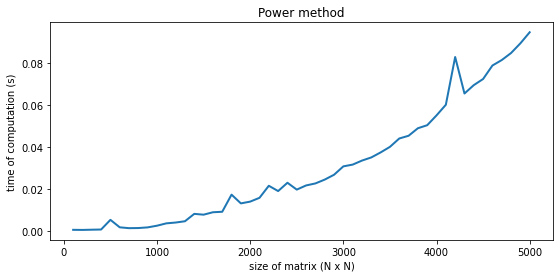

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

x = list(map(int, np.linspace(100, 5000, 50)))
y = get_time_measurements(x, 1000, 10**(-8))

ax.plot(x, y, marker='', lw=2.0)

ax.set_title("Power method")
ax.set_xlabel("size of matrix (N x N)")
ax.set_ylabel("time of computation (s)")

In [92]:
# checking correctness of my implementation of power method 
x = list(map(int, np.linspace(100, 500, 5)))
compare_with_numpy(x, 1000, 10**(-7))

True

#### Comparing power method and Rayleight quotient iteration

In [73]:
def get_comparison(size):
    matrix = get_random_matrix(size)
    _, _, power_iterations = power_method(matrix, 1000, 10**(-8), True)
    _, _, rayleight_iteartions = rayleight_quotient_iteration(matrix, 0.5, 1000, 10**(-8), True)
    
    print(f"Power method iterations: {power_iterations}")
    print(f"Rayleight quotient method iterations: {rayleight_iteartions}")    

In [82]:
get_comparison(10)

Power method iterations: 13
Rayleight quotient method iterations: 6


In [83]:
get_comparison(50)

Power method iterations: 9
Rayleight quotient method iterations: 6


In [88]:
get_comparison(100)

Power method iterations: 8
Rayleight quotient method iterations: 6


In [89]:
get_comparison(500)

Power method iterations: 6
Rayleight quotient method iterations: 5


In [90]:
get_comparison(1000)

Power method iterations: 6
Rayleight quotient method iterations: 6


In [91]:
get_comparison(2000)

Power method iterations: 6
Rayleight quotient method iterations: 5
